# Iteration comparision 0D model on 500 mols of QM9 isomers

In [2]:
import sys, pickle
import numpy as np
sys.path.append('../src/')
sys.path.append("../../scripts/")

import matplotlib.pyplot as plt
from plt_config import use_latex, TU_GREY, TU_RED
use_latex()


In [3]:
with open("plot_data/scheme_iterations_0D_model.pkl", "rb") as f:
    scheme_iterations = pickle.load(f)

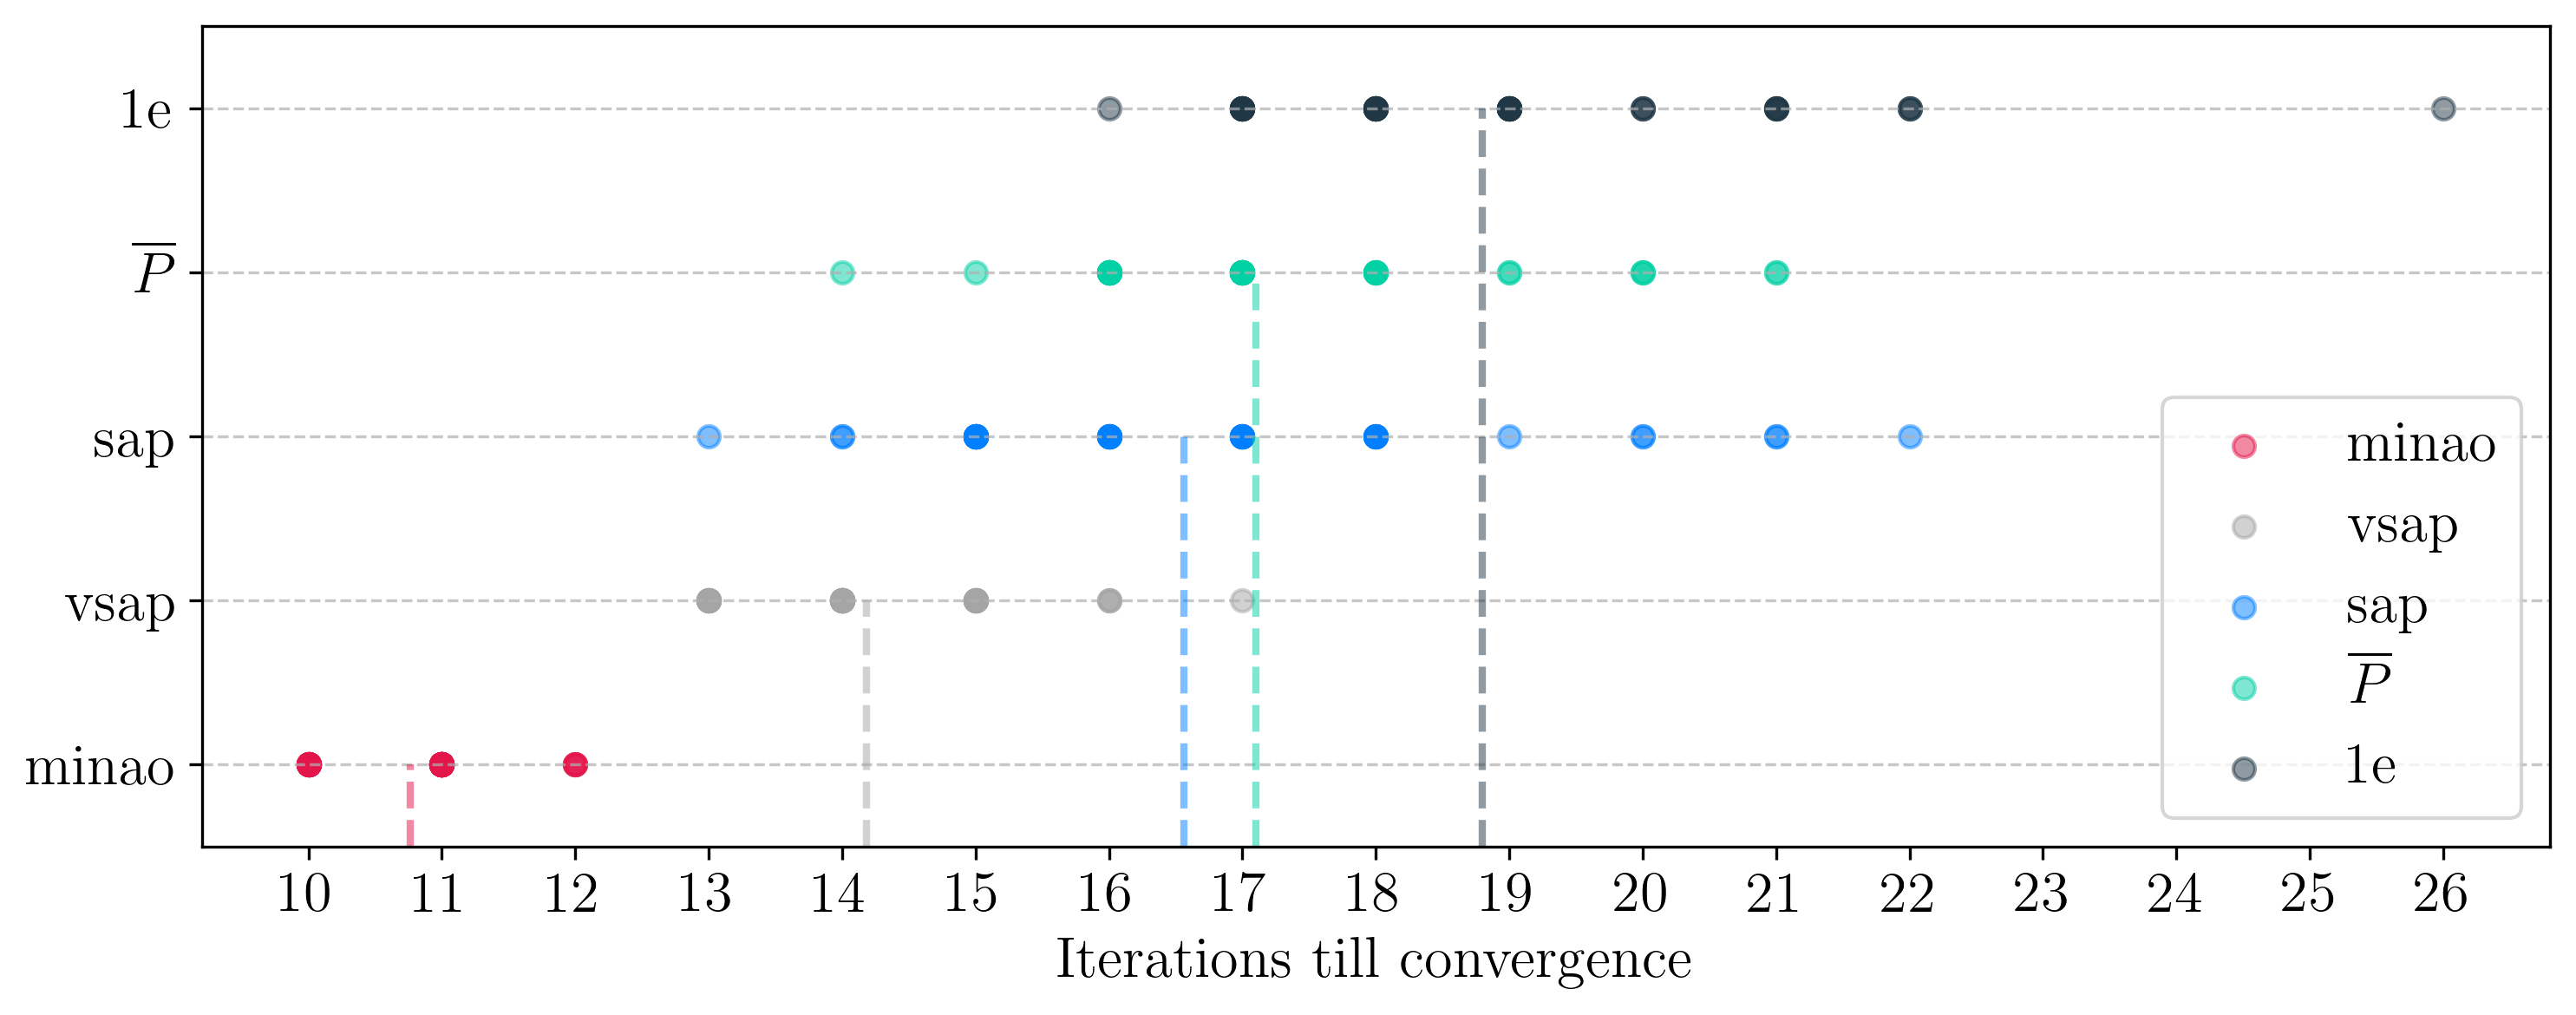

In [4]:
plt.gcf().set_size_inches(10, 4)
for i, (scheme, iterations) in enumerate(scheme_iterations.items()):
    scheme = r"$\overline{P}$" if scheme == "0-D" else scheme
    color = plt.scatter(iterations, [scheme]*len(iterations), label=scheme, alpha=0.5).get_facecolor()[0]
    plt.vlines(np.mean(iterations), ymin=-0.5, ymax=i, colors=[color], linestyles='dashed')
plt.ylim(-0.5, len(scheme_iterations) - 0.5)
plt.xticks(np.arange(10,max([max(iterations) for iterations in scheme_iterations.values()]) + 1, 1))
plt.xlabel("Iterations till convergence")
plt.grid(axis="x")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../../fig/gnn/0_d_model_iteration_count.pdf")

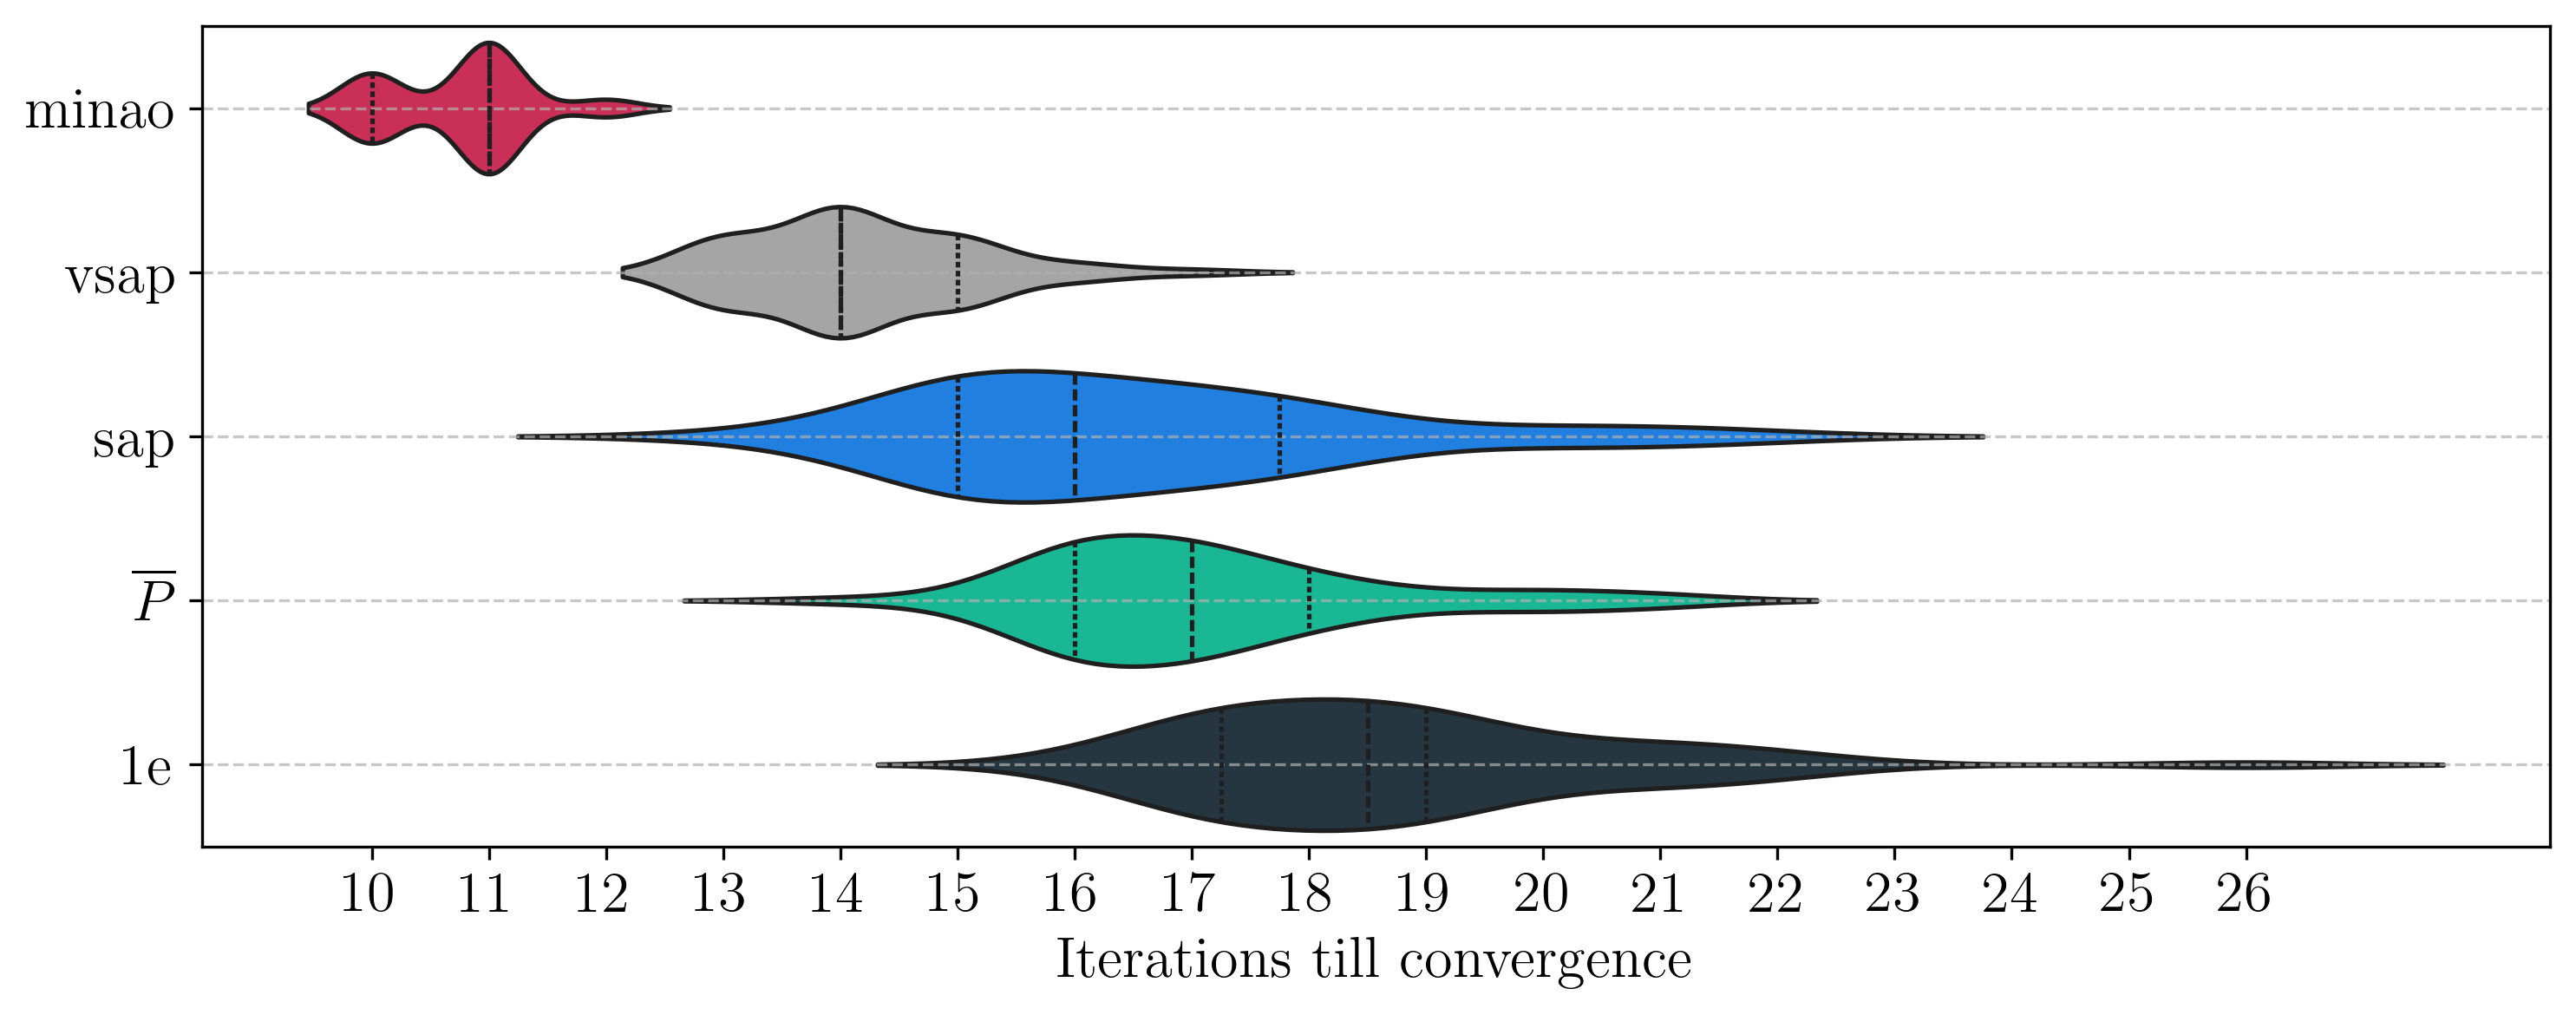

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 4))
data = []
labels = []

for scheme, iterations in scheme_iterations.items():
    label = r"$\overline{P}$" if scheme == "0-D" else scheme
    data.append(iterations)
    labels.append(label)
    

# Violinplot
sns.violinplot(data=data, inner="quartile", orient="h")
plt.yticks(ticks=range(len(labels)), labels=labels)

plt.xticks(
    np.arange(10, max(max(d) for d in data) + 1, 1)
)
plt.xlabel("Iterations till convergence")
plt.grid()
plt.legend([],[], frameon=False)  # suppress default legend
plt.tight_layout()
plt.savefig("../../fig/gnn/0_d_model_iteration_count.pdf")